This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering
4. Interpretation of the clusters

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import sklearn
import pydot
import seaborn as sns
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
PATH = '../2_Data'

In [3]:
# Import data
df_combined_global_details = pd.read_csv(join(PATH,'2_2_Prepared_Data','df_combined_global_details.csv'))
df_combined_global_details.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
1,1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
2,2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
3,3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
4,4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0


In [4]:
df_combined_global_details['Access to electricity (% of population)'].mean() # Check the mean

78.93370216207748

In [5]:
df_combined_global_details['Access to clean fuels for cooking'].mean() # Check the mean

63.25528735632183

#### imputing value for the missing value in the "Access to electricity (% of population)" and "Access to clean fuels for cooking

In [6]:
df_combined_global_details= df_combined_global_details.fillna(df_combined_global_details['Access to electricity (% of population)'].mean())

In [7]:
df_combined_global_details= df_combined_global_details.fillna(df_combined_global_details['Access to clean fuels for cooking'].mean())

In [8]:
df_combined_global_details.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,0,Afghanistan,2000,1.613591,6.2,9.22,2.000000e+04,44.99,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
1,1,Afghanistan,2001,4.074574,7.2,8.86,1.300000e+05,45.60,0.09,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
2,2,Afghanistan,2002,9.409158,8.2,8.47,3.950000e+06,37.83,0.13,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
3,3,Afghanistan,2003,14.738506,9.5,8.09,2.597000e+07,36.66,0.31,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
4,4,Afghanistan,2004,20.064968,10.9,7.75,7.893370e+01,44.24,0.33,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0


In [9]:
#Select numeric columns
numeric_cols = df_combined_global_details.select_dtypes(include='number').columns

In [10]:
#detect columns with commas
cols_with_commas=[]
for col in numeric_cols:
    if df_combined_global_details[col].astype(str).str.contains(',').any():
        cols_with_commas.append(col)

In [11]:
print(cols_with_commas)

[]


In [12]:
df_cluster = df_combined_global_details[numeric_cols]

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Rate of variation for the given cluster option
score

[-1.4652892754510689e+20,
 -5.915489959472714e+19,
 -3.1151171468960674e+19,
 -1.4828467633753102e+19,
 -9.097232197251676e+18,
 -6.521968367316332e+18,
 -4.720729636405709e+18,
 -3.3328741192360136e+18,
 -3.3020591209916554e+18]

# Clustering
Let's choose some features using our business domain knowledge and explore these. After selecting features, let's create two new dataframes with our new data called:

df_clustering
df_clustering_groups grouped by user_power access type
# Note: you're free to add and remove

In [15]:
#selected features
features_to_explore = ['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)', ]



df_clustering = df_combined_global_details[numeric_cols][features_to_explore + ['Access to electricity (% of population)']]
df_clustering_groups = df_clustering.groupby('Year').mean().reset_index().dropna(axis=0)

In [16]:
df_clustering.head() 

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Access to electricity (% of population)
0,2000,1.613591,6.2,9.22,44.99,1.613591
1,2001,4.074574,7.2,8.86,45.60,4.074574
2,2002,9.409158,8.2,8.47,37.83,9.409158
3,2003,14.738506,9.5,8.09,36.66,14.738506
4,2004,20.064968,10.9,7.75,44.24,20.064968


In [17]:
df_clustering.shape

(3649, 6)

In [18]:
df_clustering_groups.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Access to electricity (% of population)
0,2000,73.222085,59.148863,86.173521,34.745975,73.222085
1,2001,73.707979,59.573079,82.431158,34.351533,73.707979
2,2002,74.021165,60.110870,83.168019,34.260777,74.021165
3,2003,74.590201,60.670754,83.473774,33.896824,74.590201
4,2004,75.169976,61.197498,83.857553,33.722580,75.169976


In [19]:
df_clustering_groups.shape

(21, 6)

# Step 2: Standardizing our data¶
Let's keep copy df_clustering_groups dataset, in order to keep the original one for post-analysis.

In [20]:
df_clustering_std = df_clustering_groups.copy()

df_clustering_std[features_to_explore] = preprocessing.scale(df_clustering_std[features_to_explore])

df_clustering_std.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Access to electricity (% of population)
0,-1.651446,-1.505436,-1.763746,-0.917951,-0.034860,-1.505436
1,-1.486301,-1.376835,-1.608359,-1.107566,-0.074909,-1.376835
2,-1.321157,-1.293945,-1.411371,-1.070231,-0.084124,-1.293945
3,-1.156012,-1.143339,-1.206290,-1.054739,-0.121078,-1.143339
4,-0.990867,-0.989892,-1.013348,-1.035294,-0.138769,-0.989892


# Step 3: Implement clustering via K-means
Let's start K-means clustering and initially select K=3! Creating cluster column for the same dataset

In [21]:
km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=123)
df_clustering_std['cluster'] = km.fit_predict(df_clustering_std[features_to_explore])

C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


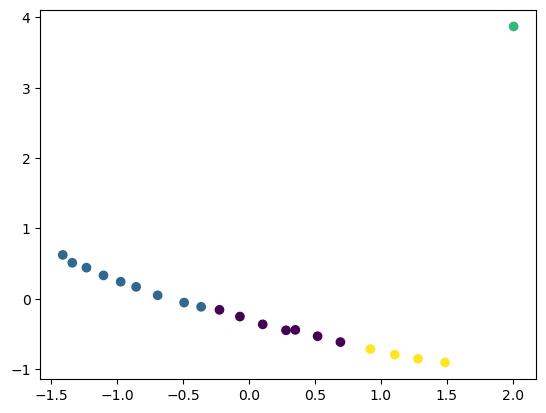

In [23]:
# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
df_clustering_std['x'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 0]
df_clustering_std['y'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 1]
plt.scatter(df_clustering_std['x'], df_clustering_std['y'], c=df_clustering_std['cluster'])
plt.show()

C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


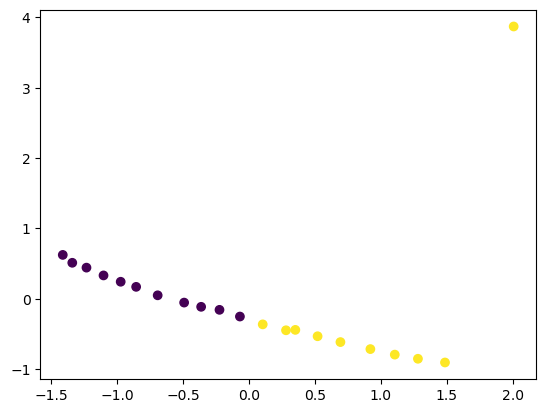

In [24]:
#Let's try it now with 2 clusters

km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)
df_clustering_std['cluster'] = km.fit_predict(df_clustering_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
df_clustering_std['x'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 0]
df_clustering_std['y'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 1]
plt.scatter(df_clustering_std['x'], df_clustering_std['y'], c=df_clustering_std['cluster'])
plt.show()

In [27]:
df_clustering_std = df_clustering_groups.copy()

df_clustering_std[features_to_explore] = preprocessing.scale(df_clustering_std[features_to_explore])

df_clustering_std.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Access to electricity (% of population)
0,-1.651446,-1.505436,-1.763746,-0.917951,-0.034860,-1.505436
1,-1.486301,-1.376835,-1.608359,-1.107566,-0.074909,-1.376835
2,-1.321157,-1.293945,-1.411371,-1.070231,-0.084124,-1.293945
3,-1.156012,-1.143339,-1.206290,-1.054739,-0.121078,-1.143339
4,-0.990867,-0.989892,-1.013348,-1.035294,-0.138769,-0.989892


C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


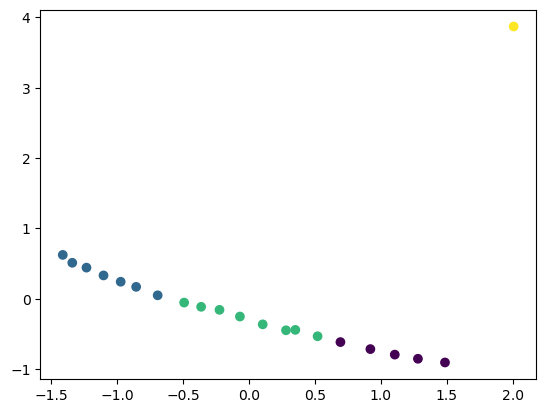

In [28]:
#Let's try it now with 4 clusters

km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)
df_clustering_std['cluster'] = km.fit_predict(df_clustering_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=4, whiten=True)
df_clustering_std['x'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 0]
df_clustering_std['y'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 1]
plt.scatter(df_clustering_std['x'], df_clustering_std['y'], c=df_clustering_std['cluster'])
plt.show()

# Optimal number of clusters¶
To find the optimal number of clusters we can user below two methods:

Elbow Method
Silhouette Coefficient

# Let's attempt to use the Elbow Method

C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TOSIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

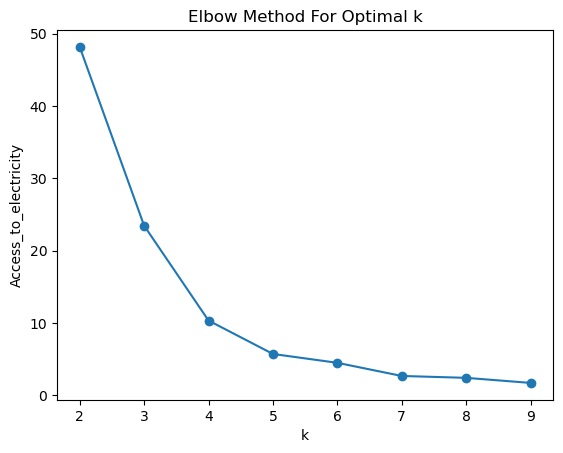

In [38]:
from sklearn.cluster import KMeans

Access_to_electricity = []

# Use k from 1 to 15
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(df_clustering_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_
    Access_to_electricity.append(km.inertia_)

# Plot Results
plt.plot(K, Access_to_electricity, marker='o')
plt.xlabel('k')
plt.ylabel('Access_to_electricity')
plt.title('Elbow Method For Optimal k')
plt.show()

# Let's stick with K=4¶

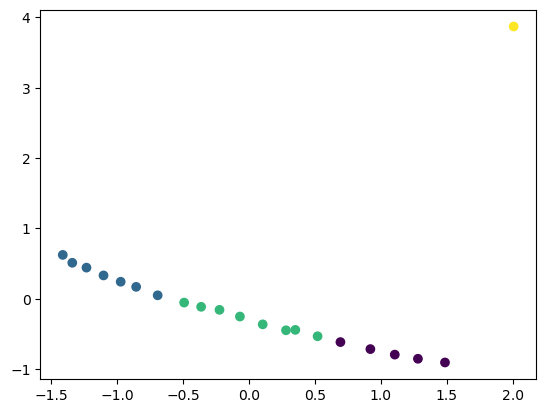

In [39]:
# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=4, whiten=True)
#pca.fit(city_groups[features_to_explore])
df_clustering_std['x'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 0]
df_clustering_std['y'] = pca.fit_transform(df_clustering_std[features_to_explore])[:, 1]
plt.scatter(df_clustering_std['x'], df_clustering_std['y'], c=df_clustering_std['cluster'])
plt.show()

# Step 4: Profile and Inspect our 4 clusters

In [40]:
df_clustering_std['cluster'].unique()

array([1, 2, 0, 3])

<Axes: xlabel='cluster'>

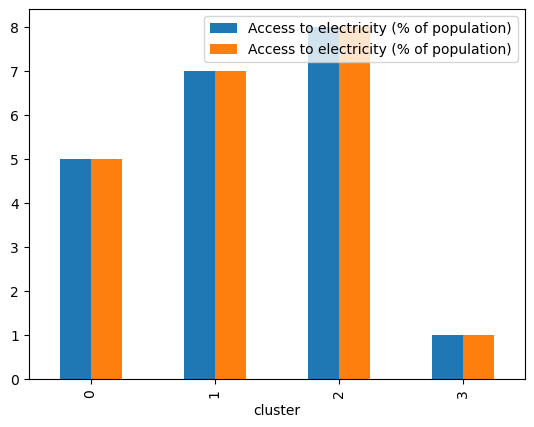

In [41]:
# Plot our Cluster Counts
df_clustering_std.groupby('cluster')['Access to electricity (% of population)'].agg('count').plot(kind='bar')

### 4.Make an Informed Decision about Number of Clusters

## Interpretation/Discuss of the Clusters

### The clusters group data points with Access to electricity and similar other energy-related amenities. 
 
### Cluster 0 is the largest, indicating most data points both high and low numbers of the population have access to electricity. 

### Clusters 1 and 2 represent groups representing populations with very low Access to electricity and similar other energy-related amenities.

### Clusters 3  groups representing populations with extremely very low Access to electricity and similar other energy-related amenities.

### The clusters can be interpreted meaningfully in the context of access to electricity :

#### Cluster 0 represents High access to electricity & similar other energy-related amenities
#### Cluster 1 & 2   represents low access to electricity & similar other energy-related amenities
#### Cluster 3 represents shallow access to electricity & similar other energy-related amenities
  

### Descriptive Statistics

#### The mean values  Access to electricity and similar other energy-related amenities increase progressively from Cluster 0 to Cluster 2, highlighting the gradient of the cluster across different clusters.

